# Random Forest – Giải pháp giảm Overfitting từ những cánh rừng

 - Bạn có từng thắc mắc tại sao mô hình đơn lẻ dễ bị overfit trong khi Random Forest lại hoạt động ổn định hơn? Hãy cùng khám phá bằng ví dụ thực tế với dữ liệu gian lận thẻ tín dụng.

## Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


##  Tải và khám phá dữ liệu

### Dữ liệu Credit Card Fraud
- Bao gồm 284,807 giao dịch.
- 492 giao dịch là gian lận (fraud = 1), còn lại là bình thường (fraud = 0).
- Các đặc trưng đã được PCA hóa (V1–V28), cùng với `Amount` và `Class` (nhãn).

Dữ liệu mất cân bằng nặng: chỉ ~0.2% là gian lận.

Nếu chỉ đoán tất cả là "bình thường" ta sẽ có accuracy ~99.8%!

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Chọn đặc trưng đơn giản

In [3]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
X = df[features]
y = df['Class']

## Chia train-test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


## Huấn luyện Decision Tree

In [5]:
tree_model = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.70      0.67      0.68       162

    accuracy                           1.00     93987
   macro avg       0.85      0.83      0.84     93987
weighted avg       1.00      1.00      1.00     93987



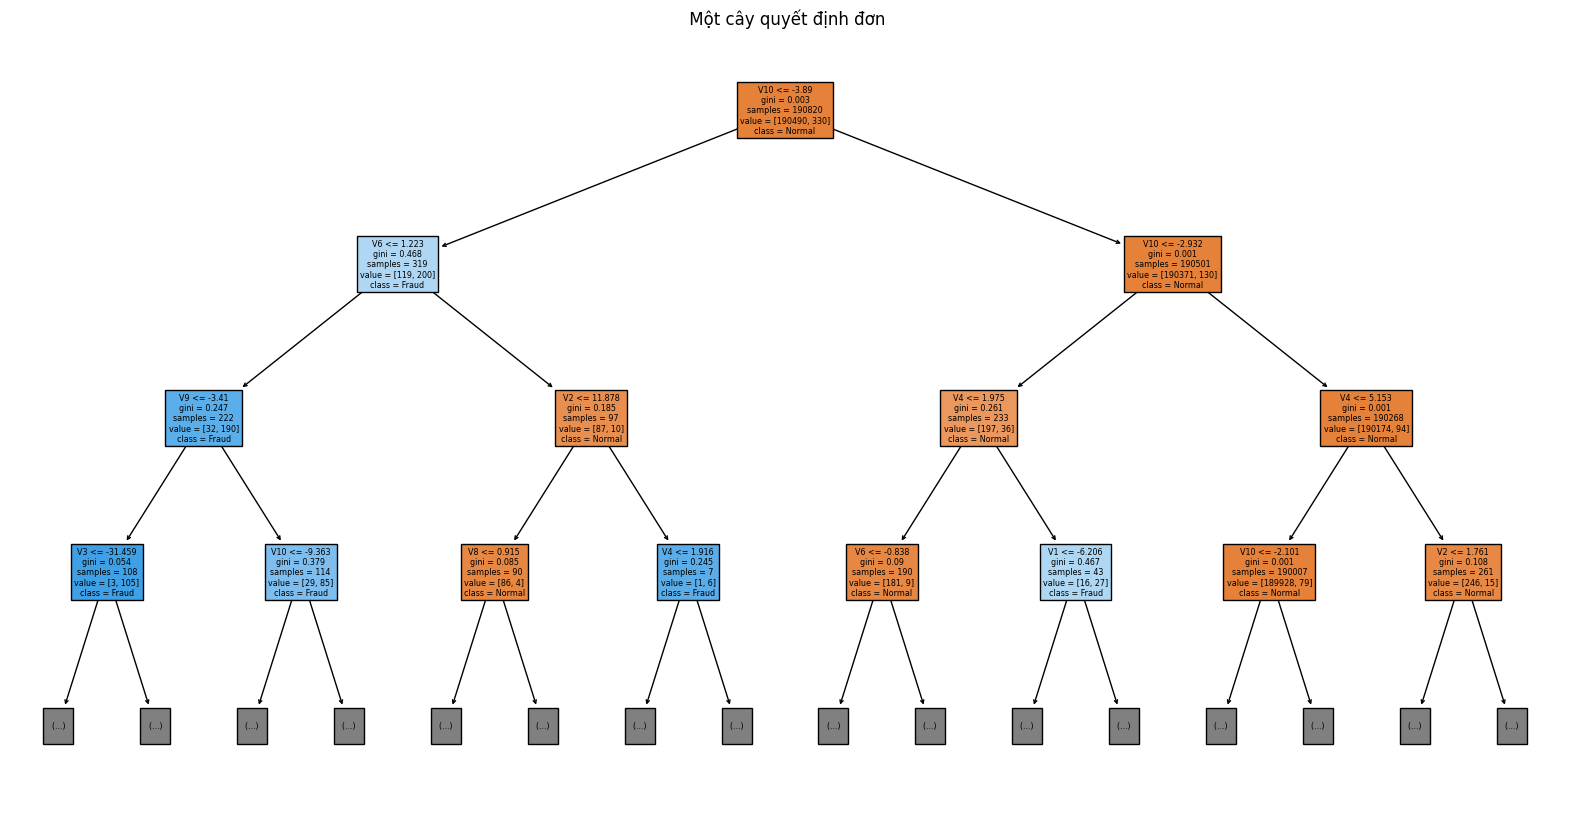

In [6]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=features, class_names=["Normal", "Fraud"], filled=True, max_depth=3)
plt.title(" Một cây quyết định đơn")
plt.show()


## Huấn luyện Random Forest 

In [7]:
forest_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)
print(classification_report(y_test, y_pred_forest))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.96      0.67      0.79       162

    accuracy                           1.00     93987
   macro avg       0.98      0.84      0.90     93987
weighted avg       1.00      1.00      1.00     93987



## So sánh kết quả

Decision Tree: F1 = 0.68 (fraud)

Random Forest: F1 = 0.79 (fraud)

In [8]:
# Tính metric cho Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Tính metric cho Random Forest
acc_forest = accuracy_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

# Hiển thị kết quả
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [acc_tree, acc_forest],
    'F1-score (fraud)': [f1_tree, f1_forest]
})
results_df = results_df.round(4)
results_df

,Model,Accuracy,F1-score (fraud)
0,Decision Tree,0.9989,0.6835
1,Random Forest,0.9994,0.7927


##  Trực quan hóa Overfitting

 Ta cần dùng F1-score để thấy sự khác biệt thực sự.
 - F1-score là gì?
    Trung bình điều hòa giữa precision và recall:
       F1 = 2*(P*R) / (P+R)

- **Precision**: Trong số các dự đoán là "gian lận", bao nhiêu phần trăm là đúng?
- **Recall**: Trong số tất cả giao dịch gian lận thật sự, mô hình phát hiện được bao nhiêu phần trăm?

=> F1-score giúp đánh giá **cân bằng** giữa việc **dự đoán đúng** và **không bỏ sót** các giao dịch gian lận.

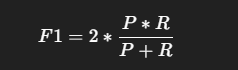

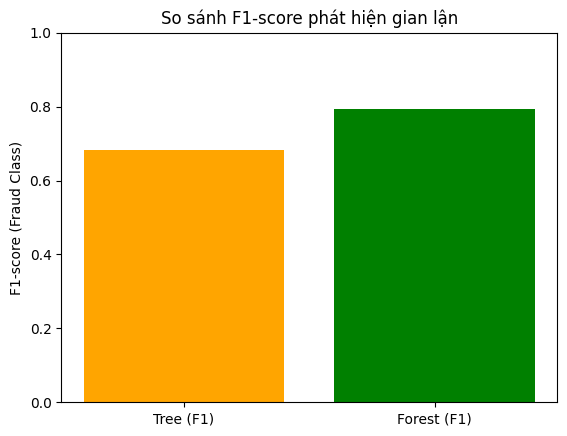

In [9]:
f1_tree = f1_score(y_test, y_pred_tree)
f1_forest = f1_score(y_test, y_pred_forest)

plt.bar(['Tree (F1)', 'Forest (F1)'], [f1_tree, f1_forest], color=['orange', 'green'])
plt.ylabel("F1-score (Fraud Class)")
plt.title("So sánh F1-score phát hiện gian lận")
plt.ylim(0, 1)
plt.show()
